### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# facturación total de cada tienda (4)

# declarar fn 
# parámetro de entrada donde tienda es un dframe que contiene la col precio
# se accede a la col precio de "x" tienda y se suman los valores
def facturacion(tienda): 
    return tienda['Precio'].sum()

# def diccionario (pares clave-valor)
resultados = {
    'tienda': float(facturacion(tienda)),
    'tienda2': float(facturacion(tienda2)),
    'tienda3': float(facturacion(tienda3)),
    'tienda4': float(facturacion(tienda4))
}

print(f'Facturación total de cada tienda: {resultados}')

Facturación total de cada tienda: {'tienda': 1150880400.0, 'tienda2': 1116343500.0, 'tienda3': 1098019600.0, 'tienda4': 1038375700.0}


In [3]:
print('Facturación total de cada tienda:')
for tiendax, facturacion in resultados.items():
    print(f'{tiendax} = ${facturacion}')

Facturación total de cada tienda:
tienda = $1150880400.0
tienda2 = $1116343500.0
tienda3 = $1098019600.0
tienda4 = $1038375700.0


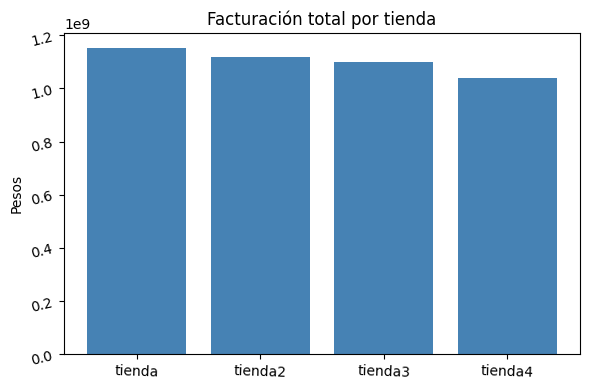

In [4]:
import matplotlib.pyplot as plt

# Separo clave-valor de resultados en 2 variables(listas) 
tiendas = list(resultados.keys())
facturacion = list(resultados.values())

plt.figure(figsize=(6, 4)) # proporción a ojo, en pulgadas
plt.bar(tiendas, facturacion, color='steelblue') #.bar, .plot, .scatter, .pie, .hist, .boxplot, .stem, stackplot, .step
plt.title('Facturación total por tienda')
plt.ylabel('Pesos')
plt.xticks(rotation=358)
plt.yticks(rotation=14) 
plt.tight_layout() # fn de matplotlib que ajusta márgenes y espacios en general
plt.show()


# 2. Ventas por categoría

In [5]:
# función para contar las ventas por categoría
# devuelve o extrae la col contenedora de categorías del df en cuestión y cuenta cuantas veces se repite cada valor único
# queda preparada 

def contar_ventas_por_categoria(df):
    return df['Categoría del Producto'].value_counts()

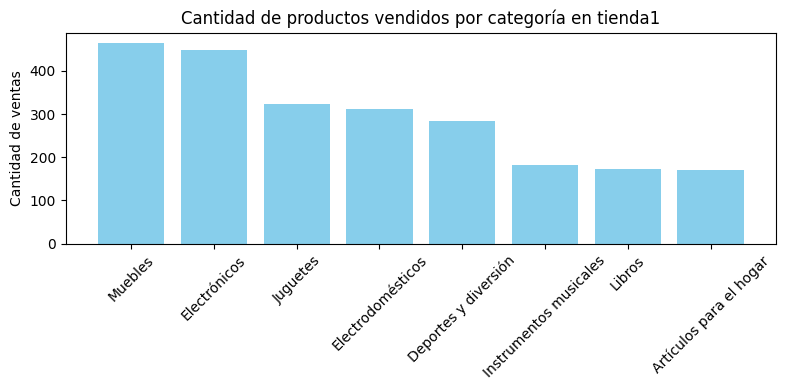

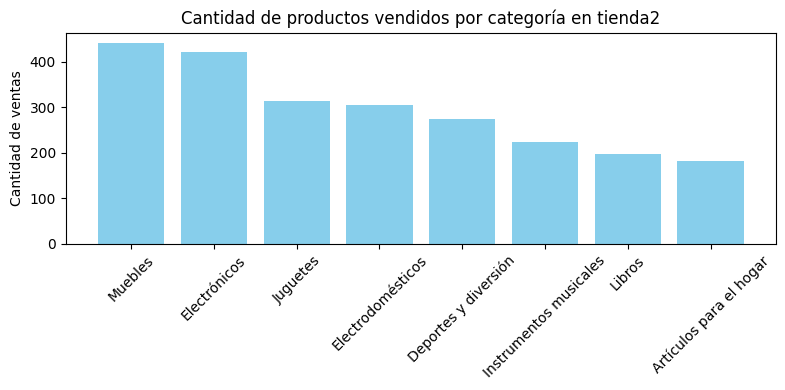

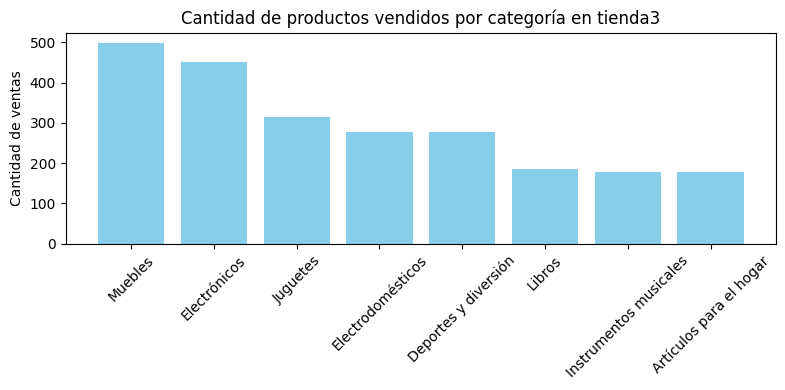

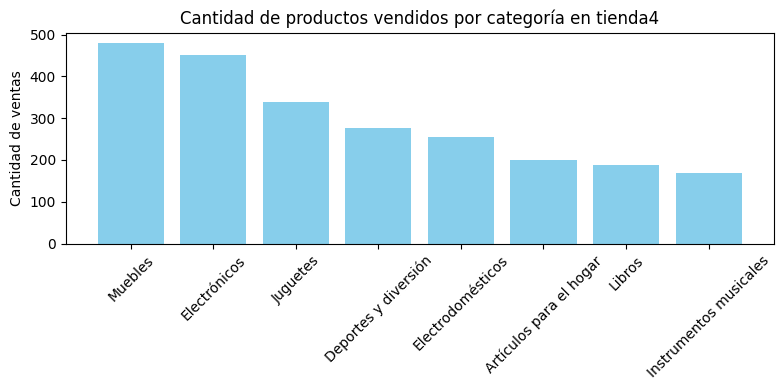

In [6]:
import matplotlib.pyplot as plt

def graficar_ventas_por_categoria(df, nombre_tienda):
    contador = contar_ventas_por_categoria(df) # var contador asignada
    plt.figure(figsize=(8, 4)) # bar size en pulgadas
    plt.bar(contador.index, contador.values, color='skyblue') # .index son los nombres de las categorías
    plt.title(f'Cantidad de productos vendidos por categoría en {nombre_tienda}')
    plt.ylabel('Cantidad de ventas')
    plt.xticks(rotation=45)
    plt.tight_layout() # agrega porporcionalidad y prolijidad al gráfico 
    plt.show()


graficar_ventas_por_categoria(tienda, 'tienda1')
graficar_ventas_por_categoria(tienda2, 'tienda2')
graficar_ventas_por_categoria(tienda3, 'tienda3')
graficar_ventas_por_categoria(tienda4, 'tienda4')

# 3. Calificación promedio de la tienda


In [7]:
# promedio de calificacion de los clientes


def promedio_calificacion(tienda):
    return round(tienda['Calificación'].mean(), 2)

In [8]:
calificaciones_promedio = {
    'tienda': float(promedio_calificacion(tienda)),
    'tienda2': float(promedio_calificacion(tienda2)),
    'tienda3': float(promedio_calificacion(tienda3)),
    'tienda4': float(promedio_calificacion(tienda4))
}

print(calificaciones_promedio)

{'tienda': 3.98, 'tienda2': 4.04, 'tienda3': 4.05, 'tienda4': 4.0}


In [9]:
print("Calificación promedio por tienda:")
for nombre, calificacion in calificaciones_promedio.items():
    print(f"{nombre}: {calificacion} estrellas")

Calificación promedio por tienda:
tienda: 3.98 estrellas
tienda2: 4.04 estrellas
tienda3: 4.05 estrellas
tienda4: 4.0 estrellas


In [10]:
mejor_tienda = max(calificaciones_promedio, key=calificaciones_promedio.get)
mejor_valor = calificaciones_promedio[mejor_tienda]
print(f"\nLa tienda mejor puntuada es {mejor_tienda} con {mejor_valor} estrellas.")


La tienda mejor puntuada es tienda3 con 4.05 estrellas.


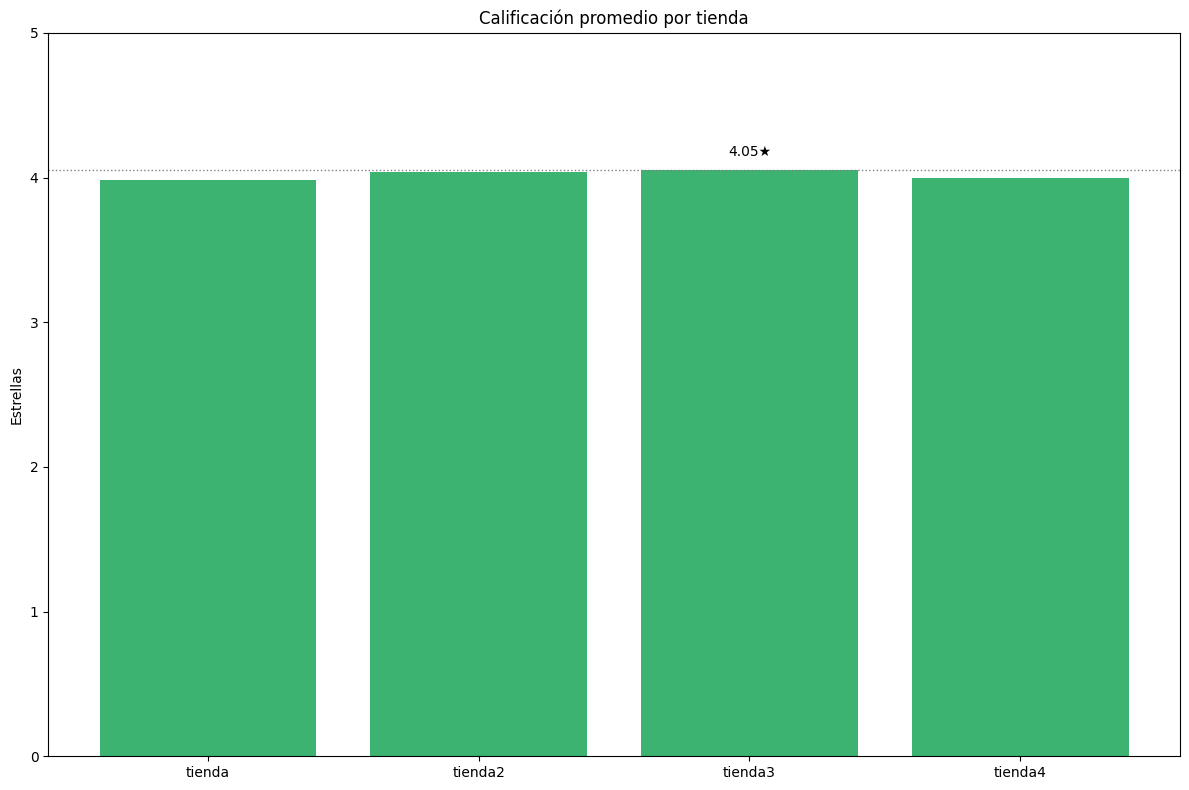

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(calificaciones_promedio.keys(), calificaciones_promedio.values(), color='mediumseagreen')
plt.title('Calificación promedio por tienda')
plt.ylabel('Estrellas')
plt.ylim(0, 5)
plt.axhline(y=mejor_valor, color='gray', linestyle='dotted', linewidth=1)                       # con ayuda de IA + documentación
plt.text(list(calificaciones_promedio.keys()).index(mejor_tienda), mejor_valor + 0.1,
         f'{mejor_valor}★', ha='center', color='black')                                        # con ayuda de IA + documentación
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [12]:
def extremos_ventas(df):
    conteo = df['Producto'].value_counts()
    return conteo.idxmax(), conteo.max(), conteo.idxmin(), conteo.min()

In [13]:
import matplotlib.pyplot as plt

def graficar_extremos_ventas(df, nombre_tienda):
    prod_max, ventas_max, prod_min, ventas_min = extremos_ventas(df)
    productos = [prod_max, prod_min]
    ventas = [ventas_max, ventas_min]
    colores = ['forestgreen', 'firebrick']

    plt.figure(figsize=(6, 4))
    plt.bar(productos, ventas, color=colores)
    for i in range(2):
        plt.text(i, ventas[i] + 0.5, f"{ventas[i]} ventas", ha='center')
    plt.title(f'{nombre_tienda}: Producto más y menos vendido')
    plt.ylabel('Cantidad de ventas')
    plt.tight_layout()
    plt.show()

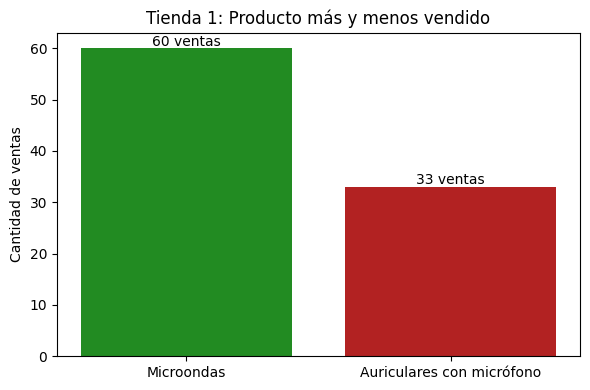

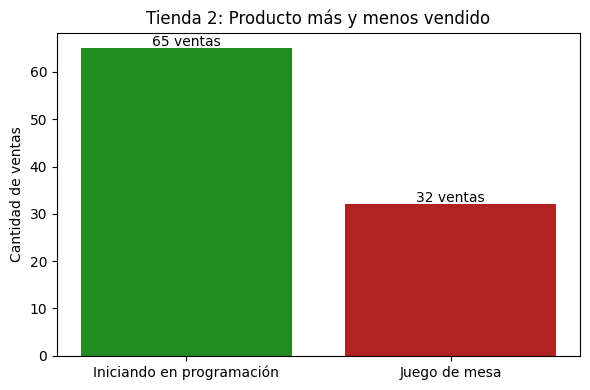

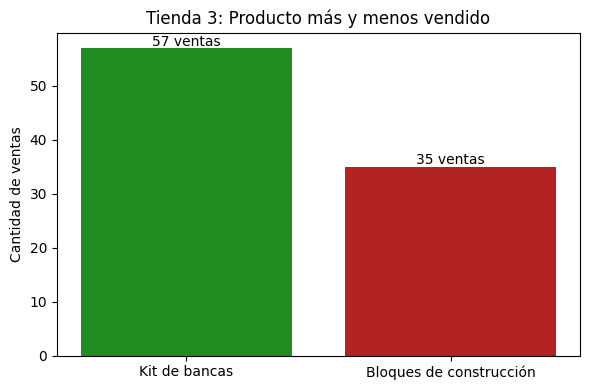

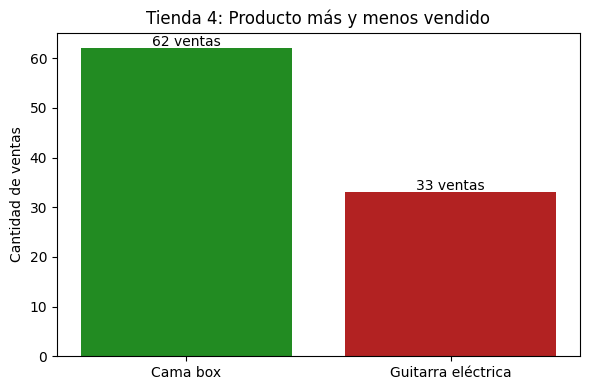

In [14]:
graficar_extremos_ventas(tienda, 'Tienda 1')
graficar_extremos_ventas(tienda2, 'Tienda 2')
graficar_extremos_ventas(tienda3, 'Tienda 3')
graficar_extremos_ventas(tienda4, 'Tienda 4')

# 5. Envío promedio por tienda

In [15]:
# costo promedio del envío

def costo_promedio_envio(tienda):
    return round(tienda['Costo de envío'].mean(), 2)

# clave-valor > {tiendax: costo}
costo_envios_promedio = {
    'tienda': costo_promedio_envio(tienda),
    'tienda2': costo_promedio_envio(tienda2),
    'tienda3': costo_promedio_envio(tienda3),
    'tienda4': costo_promedio_envio(tienda4),
}

#print(envios_promedio)

In [16]:
for nombre, costo in costo_envios_promedio.items():
    print(f'{nombre}: ${costo}')

tienda: $26018.61
tienda2: $25216.24
tienda3: $24805.68
tienda4: $23459.46


In [17]:
# identificando al "ganador". 
# del diccionario costo_envios_promedio, recorre las claves.
# key=x.get indica que la comparacion se hace según los valores asociados a cada clave 

mas_barato = min(costo_envios_promedio, key=costo_envios_promedio.get)
print(f'Tienda con menores costos de envío: \n{mas_barato} por ${costo_envios_promedio[mas_barato]}')

Tienda con menores costos de envío: 
tienda4 por $23459.46


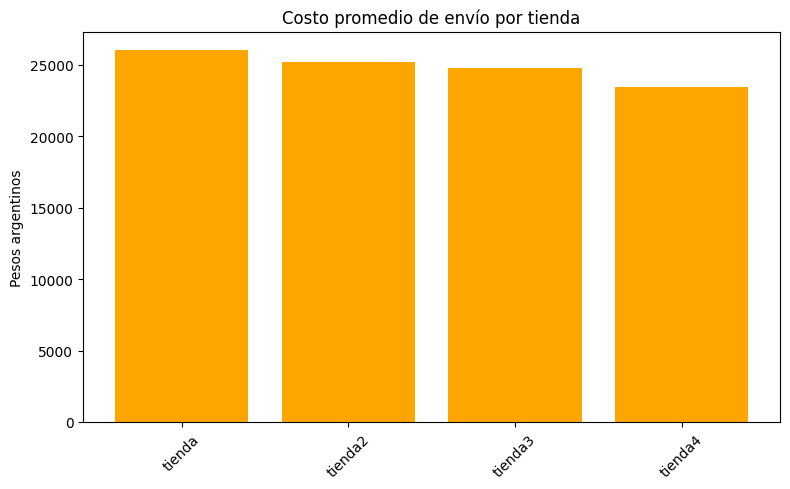

In [18]:
import matplotlib.pyplot as plt

tiendas = list(costo_envios_promedio.keys())
costos = list(costo_envios_promedio.values())

plt.figure(figsize=(8, 5))
plt.bar(tiendas, costos, color='orange')
plt.title('Costo promedio de envío por tienda')
plt.ylabel('Pesos argentinos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
'''
cadena Alura Store


>   Cree visualizaciones de datos con la biblioteca Matplotlib.
>   Decide qué tipos de gráficos utilizar para presentar los resultados de forma clara y visual.
>   Mínimo de 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.
>   Enviar una recomendación:
        Después del análisis, escriba un texto explicando a qué tienda debería vender el Sr. João y por qué, basándose en los datos presentados.
'''

'\ncadena Alura Store\n\n\n>   Cree visualizaciones de datos con la biblioteca Matplotlib.\n>   Decide qué tipos de gráficos utilizar para presentar los resultados de forma clara y visual.\n>   Mínimo de 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.\n>   Enviar una recomendación:\n        Después del análisis, escriba un texto explicando a qué tienda debería vender el Sr. João y por qué, basándose en los datos presentados.\n'